In [55]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

crime_file = r"C:\Users\Aurian\Documents\SMU_LAB_ML1\NewYorkCityCrimes2015\Data\FE1_NYPD_Complaint_Data_Historic\FE1_NYPD_Complaint_Data_Historic.csv"
df_Crime = pd.read_csv(crime_file)

C:\Users\Aurian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df_Crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0


In [20]:
#Replace all Hyphons and forward slashes with spaces
def string_replace(column):
    
    newstrings = []
    
    for string in column:
        for word in string:
            if word == '-':
                newstrings.append(string.replace('-', ' '))
                break
            elif word == '/':
                newstrings.append(string.replace('/', ' '))
                break
        else:
            newstrings.append(string)
                
    
    return ''.join(newstrings)

def crime_apply(string):
    
    for word in string.split():
        if word in violent:
            return "Violent Crime"
        elif word in non_violent:
            return "Non-Violent Crime"
    else:
        pass

In [21]:
#Create categorical list of all 68 possible offenses
#4 types of crime: Personal, Property, Statutory/State, and Other

#Personal - Assault, Battery, Abuse, Kidnapping, Rape, Homicide, Harrassment
personal_list = ['ASSAULT', 'BATTERY', 'MURDER', 'MANSLAUGHTER', 'HARRASSMENT', 'KIDNAPPING', 'RAPE', 'SEX', 'HOMICIDE', 'WEAPON', 'WEAPONS', 'PERSON']

#Property - Arson, Theft, Mischief, Burglary, Larceny, Robbery, Forgery, Embezzlement, Shoplifting, Trespass, Fraud/Financial
property_list = ['ARSON', 'THEFT', 'THEF', 'MISCHIEF', 'ROBBERY', 'BURGLARY', 'JOSTLING', 'TOOLS', 'FRAUD', 'FRAUDS', 'FRAUDULENT', 'LARCENY', 'FORGERY', 'STOLEN', 'UNAUTHORIZED', 'TRESPASS']

#Statutory - State-Related offenses, DUI, DWI, Gambling, Loitering, Drug, Traffic, Public Servant/Admin-related crimes
statutory_list = ['DRUGS', 'DRUG', 'SENSBLTY', 'PENAL', 'PUBLIC', 'INTOXICATED', 'TRAFFIC', 'ADMINISTRATIVE', 'GAMBLING', 'PROSTITUTION', 'ALCOHOLIC', 'DISORDERLY']

#Violent vs Non-Violent
violent = personal_list
non_violent = property_list + statutory_list

In [22]:
#Remove NA's before applying Algo.. only removes about 2-3k observations
df_Crime = df_Crime[df_Crime['OFNS_DESC'].notna()] 
df_Crime['OFNS_DESC'] = df_Crime.apply(lambda x: string_replace(x['OFNS_DESC']), axis = 1)
df_Crime['OFNS_DESC_TYPE'] = df_Crime.apply(lambda x: crime_apply(x['OFNS_DESC']), axis = 1)
df_Crime.head(15)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,OFNS_DESC_TYPE
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0,Non-Violent Crime
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON NEGL. MANSLAUGHTER,NaN,NaN,...,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0,Violent Crime
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0,Non-Violent Crime
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0,Violent Crime
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0,Violent Crime
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,December,31.0,2015.0,Short,Winter,Late Night,46.0,6.0,5.0,Violent Crime
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,December,31.0,2015.0,NaN,Winter,Late Night,55.0,5.0,6.0,Non-Violent Crime
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,December,31.0,2015.0,NaN,Winter,Late Night,87.0,7.0,9.0,Violent Crime
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,87.0,7.0,9.0,Violent Crime
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,December,31.0,2015.0,NaN,Winter,Late Night,66.0,6.0,7.0,Non-Violent Crime


In [23]:
df_Crime.shape

(1045695, 39)

In [24]:
#Features of interest
df_Crime = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y','OFNS_DESC_TYPE']]

In [25]:
print(df_Crime.shape)
df_Crime.isna().sum()

(1045695, 18)


JURIS_DESC                0
BORO_NM                   0
ADDR_PCT_CD               1
LOC_OF_OCCUR_DESC    216633
PREM_TYP_DESC          4676
Day_Name                 65
Duration             205484
Duration_to_PD           65
Month                    65
Day                      65
Year                     65
Duration_lbl         256976
Season                   65
Daytime               49781
GeoCell               32363
GeoCell_X             32329
GeoCell_Y             32362
OFNS_DESC_TYPE         1579
dtype: int64

In [26]:
df_Crime = df_Crime.dropna()
print(df_Crime.shape)

(586995, 18)


In [27]:
#counts after dropping na's
df_Crime['OFNS_DESC_TYPE'].value_counts()

Non-Violent Crime    405259
Violent Crime        181736
Name: OFNS_DESC_TYPE, dtype: int64

In [28]:
#Assign target and features
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['OFNS_DESC_TYPE']]

In [29]:
#dummy variables for categoricals
cat_vars=['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var)
    data1=X.join(cat_list)
    X=data1

data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
#keep only the non-categoricals and the new dummy variables
X = X[to_keep]
X.columns

Index(['Duration', 'Duration_to_PD', 'Day', 'Year', 'GeoCell', 'GeoCell_X',
       'GeoCell_Y', 'JURIS_DESC_AMTRACK', 'JURIS_DESC_DEPT OF CORRECTIONS',
       'JURIS_DESC_HEALTH & HOSP CORP',
       ...
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Daytime_Day', 'Daytime_Early Morning', 'Daytime_Evening',
       'Daytime_Late Night', 'Daytime_Morning', 'Daytime_Night'],
      dtype='object', length=214)

In [35]:
#Create new vars
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['OFNS_DESC_TYPE']]

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_to_scale = ['Duration','Duration_to_PD']
columns_no_change = ['Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder and scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False)

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X[columns_to_scale])
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together
X_np = np.concatenate([scaled_columns,encoded_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe
df1 = pd.DataFrame(X_np)
df1

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
1,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,46.0,6.0,5.0
2,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,87.0,7.0,9.0
3,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,77.0,7.0,8.0
4,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586990,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,27.0,7.0,3.0
586991,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,65.0,5.0,7.0
586992,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,77.0,7.0,8.0
586993,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,37.0,7.0,4.0


In [37]:
#get the column names back to the dataframe
feature_names = ohe.get_feature_names().tolist()
#df = pd.DataFrame(feature_names)
#df = df.T
col_names = columns_to_scale+feature_names+columns_no_change
df1.columns = col_names
X = df1
X

,Duration,Duration_to_PD,x0_AMTRACK,x0_DEPT OF CORRECTIONS,x0_HEALTH & HOSP CORP,x0_LONG ISLAND RAILRD,x0_METRO NORTH,x0_N.Y. HOUSING POLICE,x0_N.Y. POLICE DEPT,x0_N.Y. STATE PARKS,...,x9_Early Morning,x9_Evening,x9_Late Night,x9_Morning,x9_Night,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
0,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
1,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,46.0,6.0,5.0
2,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,87.0,7.0,9.0
3,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,77.0,7.0,8.0
4,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586990,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,27.0,7.0,3.0
586991,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,65.0,5.0,7.0
586992,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,77.0,7.0,8.0
586993,-0.490963,-0.044353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,37.0,7.0,4.0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators = 10, random_state = 0)

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

print('Cross Validation Results:'.format(cv_results.mean()))

Cross Validation Results:


In [40]:
cv_results

array([0.72651193, 0.729046  , 0.72666099, 0.72772572, 0.72602215,
       0.72840716, 0.72935965, 0.726932  , 0.72573947, 0.72674035])

In [41]:
clf.fit(X_train,y_train)
clf_predictions = clf.predict(X_test)

C:\Users\Aurian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Duration, Score: 0.06435
Duration_to_PD, Score: 0.04894
x0_AMTRACK, Score: 0.00000
x0_DEPT OF CORRECTIONS, Score: 0.00014
x0_HEALTH & HOSP CORP, Score: 0.00025
x0_LONG ISLAND RAILRD, Score: 0.00001
x0_METRO NORTH, Score: 0.00003
x0_N.Y. HOUSING POLICE, Score: 0.00399
x0_N.Y. POLICE DEPT, Score: 0.00274
x0_N.Y. STATE PARKS, Score: 0.00000
x0_N.Y. STATE POLICE, Score: 0.00009
x0_N.Y. TRANSIT POLICE, Score: 0.00000
x0_NEW YORK CITY SHERIFF OFFICE, Score: 0.00002
x0_NYC PARKS, Score: 0.00000
x0_NYS DEPT TAX AND FINANCE, Score: 0.00000
x0_OTHER, Score: 0.00061
x0_POLICE DEPT NYC, Score: 0.00005
x0_PORT AUTHORITY, Score: 0.00014
x0_STATN IS RAPID TRANS, Score: 0.00000
x0_TRI-BORO BRDG TUNNL, Score: 0.00004
x0_U.S. PARK POLICE, Score: 0.00000
x1_BRONX, Score: 0.00261
x1_BROOKLYN, Score: 0.00374
x1_MANHATTAN, Score: 0.00689
x1_QUEENS, Score: 0.00355
x1_STATEN ISLAND, Score: 0.00137
x2_FRONT OF, Score: 0.00451
x2_INSIDE, Score: 0.00784
x2_OPPOSITE OF, Score: 0.00420
x2_REAR OF, Score: 0.00269
x

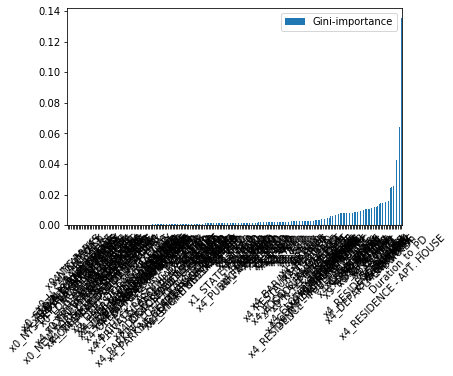

In [42]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [43]:
#Top features
df_top_features = importances[importances['Gini-importance']>.0045]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

C:\Users\Aurian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Gini-importance,feature
Day,0.135424,Day
Duration,0.064353,Duration
Duration_to_PD,0.048944,Duration_to_PD
Year,0.042943,Year
GeoCell,0.041333,GeoCell
GeoCell_X,0.025667,GeoCell_X
x4_RESIDENCE - APT. HOUSE,0.024964,x4_RESIDENCE - APT. HOUSE
GeoCell_Y,0.024648,GeoCell_Y
x5_Friday,0.015742,x5_Friday
x5_Thursday,0.015503,x5_Thursday


In [53]:
y_enc = y
y_enc['OFNS_DESC_TYPE'] = y_enc['OFNS_DESC_TYPE'].astype('category')
y_enc['OFNS_DESC_TYPE_CAT'] = y_enc['OFNS_DESC_TYPE'].cat.codes
del y_enc['OFNS_DESC_TYPE']
y_enc.head(5)

TypeError: list indices must be integers or slices, not str

In [54]:
#now use only top features
X = X[top_features]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(),test_size=0.2,random_state=0)

#saga can handle multinomial loss, L2 and L1 penalty
#multinomial the loss is minimized
clf_LR = LogisticRegression(random_state=0, max_iter=10000)

clf_LR.fit(X_train,y_train)

predictions = clf_LR.predict(X_test)

TypeError: list indices must be integers or slices, not list

In [48]:
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82     81239
           1       0.59      0.37      0.46     36160

    accuracy                           0.73    117399
   macro avg       0.67      0.63      0.64    117399
weighted avg       0.71      0.73      0.71    117399



In [52]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

TypeError: cannot perform reduce with flexible type